In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
buildings_list = os.listdir('seg_train/buildings')
forest_list = os.listdir('seg_train/forest')
glacier_list = os.listdir('seg_train/glacier')
mountain_list = os.listdir('seg_train/mountain')
sea_list = os.listdir('seg_train/sea')
street_list = os.listdir('seg_train/street')

In [3]:
label_list = [buildings_list, forest_list, glacier_list, mountain_list, sea_list, street_list]

In [4]:
size = len(buildings_list + forest_list + glacier_list + mountain_list + sea_list +  street_list)

In [5]:
lbl = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [6]:
X = np.zeros((size, 150, 150, 3))
y = []
k = 0
j = 0
for label in label_list: 
    for i in label:
        link = 'seg_train/' + lbl[j] + '/' + i
        img = Image.open(link)
        X[k,:] = np.asarray(img)/255.0
        y.append(j)
        k +=1
    j +=1

In [ ]:
#X = X.reshape(size, 150, 150, 1)

In [7]:
y = np.array(y)

In [10]:
#import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, MaxPooling2D
from keras.layers.convolutional import Conv2D

Using TensorFlow backend.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=101)

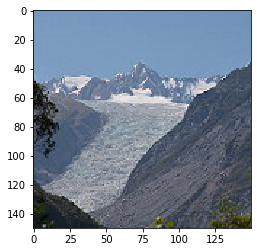

In [13]:
plt.imshow(X_train[8])

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
lb = LabelBinarizer()

In [16]:
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

In [18]:
#model = tf.keras.models.Sequential([
#    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#    tf.keras.layers.MaxPooling2D(2, 2),
#
#    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2, 2),
#
#    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2, 2),
#
#    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#    tf.keras.layers.MaxPooling2D(2, 2),
#
#    tf.keras.layers.Dropout(0.5),
#    tf.keras.layers.Flatten(),
#    tf.keras.layers.Dense(512, activation='relu'),
#    tf.keras.layers.Dense(6, activation='softmax')
#])

In [19]:
Epochs = 10

In [20]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
h = model.fit(X_train, y_train, epochs = Epochs, validation_data = (X_val, y_val))

Train on 11433 samples, validate on 2018 samples
Epoch 1/10
11433/11433 [==============================] - 359s 31ms/step - loss: 1.0015 - accuracy: 0.6171 - val_loss: 0.6573 - val_accuracy: 0.7507
Epoch 2/10
11433/11433 [==============================] - 329s 29ms/step - loss: 0.6423 - accuracy: 0.7556 - val_loss: 0.5360 - val_accuracy: 0.7894
Epoch 3/10
11433/11433 [==============================] - 318s 28ms/step - loss: 0.5156 - accuracy: 0.8044 - val_loss: 0.4863 - val_accuracy: 0.8077
Epoch 4/10
11433/11433 [==============================] - 318s 28ms/step - loss: 0.4155 - accuracy: 0.8456 - val_loss: 0.4977 - val_accuracy: 0.8112
Epoch 5/10
11433/11433 [==============================] - 318s 28ms/step - loss: 0.3388 - accuracy: 0.8724 - val_loss: 0.4779 - val_accuracy: 0.8261
Epoch 6/10
11433/11433 [==============================] - 326s 29ms/step - loss: 0.2343 - accuracy: 0.9122 - val_loss: 0.4505 - val_accuracy: 0.8449
Epoch 7/10
11433/11433 [==============================] -

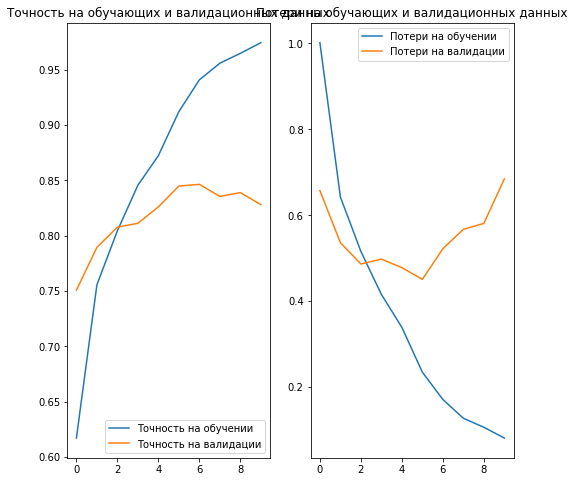

In [37]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

loss = h.history['loss']
val_loss = h.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

In [38]:
#Testing

In [39]:
buildings_list_test = os.listdir('seg_test/buildings')
forest_list_test = os.listdir('seg_test/forest')
glacier_list_test = os.listdir('seg_test/glacier')
mountain_list_test = os.listdir('seg_test/mountain')
sea_list_test = os.listdir('seg_test/sea')
street_list_test = os.listdir('seg_test/street')

In [40]:
label_list_test = [buildings_list_test, forest_list_test, glacier_list_test, mountain_list_test, sea_list_test, street_list_test]

In [41]:
size_test = len(buildings_list_test + forest_list_test + glacier_list_test + mountain_list_test + sea_list_test +  street_list_test)

In [42]:
X_test = np.zeros((size_test, 150, 150, 3))
y_test = []
k = 0
j = 0
for label in label_list_test: 
    for i in label:
        link = 'seg_test/' + lbl[j] + '/' + i
        img = Image.open(link)
        X_test[k,:] = np.asarray(img)/255.0
        y_test.append(j)
        k +=1
    j +=1
y_test = np.array(y_test).reshape(size_test,1)

In [43]:
#y_test = lb.transform(y_test)

In [44]:
from sklearn.metrics import classification_report

In [73]:
prediction = model.predict(X_test)

In [74]:
pred = prediction.argmax(axis = 1)

In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.20      0.03      0.06      2306
           1       0.03      0.04      0.04       401
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.04      2707
   macro avg       0.04      0.01      0.02      2707
weighted avg       0.17      0.04      0.06      2707



/Users/andrii/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#for i in street_list:
#    link = 'seg_train/street/' + i
#    img = Image.open(link).convert('L')
#    X = np.asarray(img)
#    if X.shape != (150,150):
#        print(link)
#        os.remove(link)

In [50]:
y_test.shape

(2707, 6)

In [69]:
y_test[:,:1].shape

(2707, 1)

In [71]:
prediction.shape

(2707, 6)